# 전처리

In [4]:
from collections import deque
from sklearn.cluster import KMeans
import numpy as np
import csv
#csv는 엑셀과 달리 , 를 통해 데이터를 구분
def distance(x,y):
    dist = np.linalg.norm(np.array(x)- np.array(y))
    return dist 
# np.linalg.norm -> L2 norm 벡터 p,q의 직선 거리 
# (x^2 + y^2)^(1/2)


#given cities
cities = []
#solution
path= []

with open('TSP.csv', mode = 'r', newline='') as tsp:
    #마찬가지로 읽기 방식으로 TSP.csv를 가져온다 -> 0행에는 x좌표 1행에는 y 좌표가 들어 있음
    
    #read TSP city map
    reader = csv.reader(tsp)
    for row in reader: # -> 가로 축으로 읽으므로 각 열 별로[x,y] 형태로 들어가게 된다
        cities.append(row)

cities =np_cities = np.array(cities).astype('float64')



def cen_greedy_path(target_cluster, start_node_num, path):
    
    for i in range(0,len(target_cluster)):
        
        if len(path)==0: #처음 집어 넣는 거
            path.append(start_node_num)
        else:
            current_node_num = path.pop() #제일 마지막에 넣은거 꺼내서 current_node_num 에 저장
            #print(current_node_num)
            path.append(current_node_num) #path 는 그대로 있어야지
    
            min_distance = 10000 #아무리 멀어도 10000보다는 작음
    
             #current node는 가장 최근에 넣은 node
            for node_num in range(0,len(target_cluster)): # 0~ 클러스터 개수 - 1 까지 
                if (current_node_num == node_num): #자기 자신은 예외처리
                    pass
                else:
                    if node_num in path:
                        pass
                    else:
                        if(min_distance >= distance(target_cluster[current_node_num],target_cluster[node_num])):
                            next_node_num = node_num
                            min_distance = distance(target_cluster[current_node_num],target_cluster[node_num])
                            #print(min_distance)
                        else:
                            pass
        
            path.append(next_node_num) #갱신
       
    
    
    return path


#overloading
def greedy_path(target_cluster, start_node_num, path,target_cluster_idx):
  
    next_node_num = 777777777777 #이거 들어가면 오류뜨게 하려고
    
    for i in  target_cluster_idx:
        
        if len(path)==0: #처음 집어 넣는 거
            path.append(start_node_num)
        else:
            current_node_num = path.pop() #제일 마지막에 넣은거 꺼내서 current_node_num 에 저장
            #print(current_node_num)
            path.append(current_node_num) #path 는 그대로 있어야지
            
            min_distance = 10000 #아무리 멀어도 10000보다는 작음
            
             #current node는 가장 최근에 넣은 node
            for node_num in target_cluster_idx: # 0~ 클러스터 개수 - 1 까지 
                if (current_node_num == node_num): #자기 자신은 예외처리
                    pass
                else:
                    if node_num in path:
                        pass
                    else:
                        if(min_distance >= distance(target_cluster[current_node_num],target_cluster[node_num])):
                            next_node_num = node_num
                            min_distance = distance(target_cluster[current_node_num],target_cluster[node_num])
                            #print(min_distance)
                        else:
                            pass
            
            path.append(next_node_num) #갱신
       
    
    
    return path


def cal_cost(my_path):
    dist = 0
    for idx in range (0,len(my_path)):
        if (idx == len(my_path)-1):
            pass #path의 맨끝에는 생략
        else:
            dist = dist + distance(np_cities[my_path[idx]],np_cities[my_path[idx+1]])
    dist = dist + distance(np_cities[my_path[0]],np_cities[path[len(my_path)-1]]) #마지막 돌아오는거 추가
    return dist


# 클러스터 개수 20개 ~ 100개 까지 30번 만들어봄

최적의 클러스터의 개수를 대략적으로 판단하기 위함

In [5]:
# 클러스터의 개수를 미리 지정(20~30)
#k = 30
print("###############################")
# x: k    y= cost
x_for_graph=[]
y_for_graph=[]

k_best=[]
cost_k_best=[]

for repeat in range (0,31):

    ans_path =[0 for i in range(1000)]
    min_k=777777777777777
    cost_min = 10000000

    for k in range (20,100):
        kmeans = KMeans(n_clusters = k)
        y_pred = kmeans.fit_predict(cities)
        #print("y_pred의 개수 : ",len(y_pred))

        x_cen =[]
        y_cen=[]
        for i in range (0,10):
            x_cen.append(kmeans.cluster_centers_[i][0])
            y_cen.append(kmeans.cluster_centers_[i][1])

        index_cluster_ele = []
        index_total = []

        for n in range (0,k):
            index_cluster_ele.append([])


        for idx in range (0,1000):
                index_cluster_ele[y_pred[idx]].append(int(idx))
           
        NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
        temp_cen_dis = []
        cen_dis = []
        temp=100
        i=0
        for j in range(0,NUMBER_OF_CLUSTER):
            if i==j: #예외처리
                pass
            else:
                if(temp >= distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])):
                    index_min_distance = j
                    temp = distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])
                    temp_cen_dis.append(j)
                else:
                    pass
        cen_dis.append(max(temp_cen_dis))
        x_cen =[]
        y_cen=[]
        for i in range (0,len( kmeans.cluster_centers_)):
            x_cen.append(kmeans.cluster_centers_[i][0])
            y_cen.append(kmeans.cluster_centers_[i][1])

        start_node_num = cen_dis[0]


        center_path = deque([])
        target_cluster = kmeans.cluster_centers_ #이따가 클러스터 내부도 하기 위해서 center들 모임도 cluster 취급
        start_node_num = cen_dis[0]
        cen_path = cen_greedy_path(target_cluster,start_node_num,center_path)
        target_cluster = np_cities

        path =[]
        count = 0

        for number_of_cluster in cen_path: #0~ 까지 위의 루트대로    
            temp_pos = [i for i, x in enumerate(y_pred) if x == number_of_cluster] #각 cluster의 index 가 저장돤다
    
            start_node_num = temp_pos[0] #클러스터 내부의 시작점
            cluster_number = number_of_cluster
            start_node = kmeans.cluster_centers_[cluster_number] #오차가 무시할 정도

            path = greedy_path(target_cluster, start_node_num, path,temp_pos)
        
       # print("k : ",k)
       # print(cal_cost(path))
    
        x_for_graph.append(k)
        y_for_graph.append(cal_cost(path))
    
    #갱신
        if(cost_min >cal_cost(path)):
            min_k = k
            cost_min = cal_cost(path)
            for i in range(0,1000):
                ans_path[i] = path[i]    
            #print(min_k)
    k_best.append(min_k)
    cost_k_best.append(cost_min)
    print("#This is ",repeat," trials")
    print("#cost : " ,cost_min)
    print("#min_k : ",min_k)
    print("###############################")

###############################
#This is  0  trials
#cost :  3009.160001886102
#min_k :  94
###############################
#This is  1  trials
#cost :  2978.439976623468
#min_k :  33
###############################
#This is  2  trials
#cost :  2935.249051824872
#min_k :  25
###############################
#This is  3  trials
#cost :  2985.482398836215
#min_k :  21
###############################
#This is  4  trials
#cost :  3037.7439361884676
#min_k :  27
###############################
#This is  5  trials
#cost :  2985.7079077396784
#min_k :  37
###############################
#This is  6  trials
#cost :  2983.5116826226686
#min_k :  25
###############################
#This is  7  trials
#cost :  2994.9532372341637
#min_k :  24
###############################
#This is  8  trials
#cost :  2955.5290746250575
#min_k :  22
###############################
#This is  9  trials
#cost :  2946.621774195894
#min_k :  31
###############################
#This is  10  trials
#cost :  2991.58196747

# Number of cluster - cost value graph

Text(36, 2900, 'k=36')

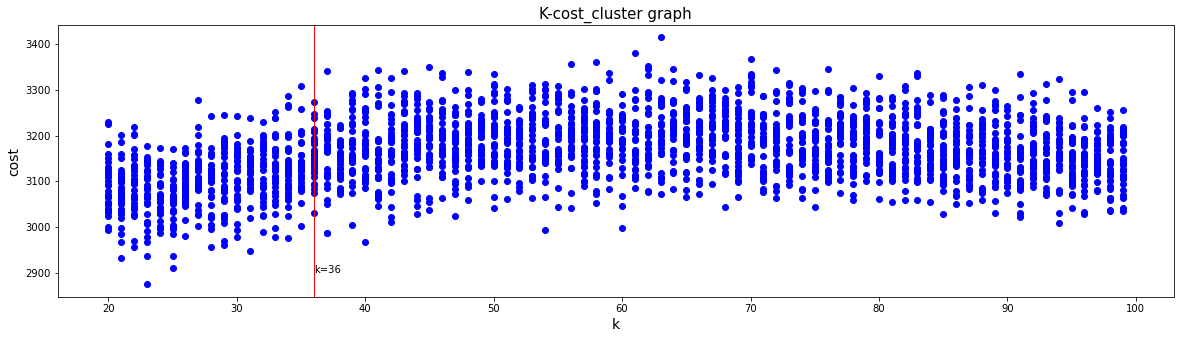

In [15]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(20, 5)) #그래프의 크기조절

plt.title("K-cost_cluster graph", fontsize = 15) #그래프의 제목설정
plt.xlabel("k", fontsize=14) #x축 라벨설정
plt.ylabel("cost", fontsize=14) #y축 라벨설정

plt.scatter(x_for_graph, y_for_graph, c='b') # cluster의 center를 빨강으로 표시

plt.axvline(36, color='r', linewidth=1)
plt.text(36,2900, 'k=36')
#plt.scatter(min_k,y_for_graph[min_k-20], c='r') # cluster의 center를 빨강으로 표시

cost가 최소값이 되는 범위를 잡음 

이 범위에 따라 한번 더 반복 실행(30번)

In [17]:
# 클러스터의 개수를 미리 지정(20~30)
#k = 30
print("###############################")
# x: k    y= cost
x_for_graph=[]
y_for_graph=[]

k_best=[]
cost_k_best=[]

for repeat in range (0,31):

    ans_path =[0 for i in range(1000)]
    min_k=777777777777777
    cost_min = 10000000

    for k in range (20,36):
        kmeans = KMeans(n_clusters = k)
        y_pred = kmeans.fit_predict(cities)
        #print("y_pred의 개수 : ",len(y_pred))

        x_cen =[]
        y_cen=[]
        for i in range (0,10):
            x_cen.append(kmeans.cluster_centers_[i][0])
            y_cen.append(kmeans.cluster_centers_[i][1])

        index_cluster_ele = []
        index_total = []

        for n in range (0,k):
            index_cluster_ele.append([])


        for idx in range (0,1000):
                index_cluster_ele[y_pred[idx]].append(int(idx))
           
        NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
        temp_cen_dis = []
        cen_dis = []
        temp=100
        i=0
        for j in range(0,NUMBER_OF_CLUSTER):
            if i==j: #예외처리
                pass
            else:
                if(temp >= distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])):
                    index_min_distance = j
                    temp = distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])
                    temp_cen_dis.append(j)
                else:
                    pass
        cen_dis.append(max(temp_cen_dis))
        x_cen =[]
        y_cen=[]
        for i in range (0,len( kmeans.cluster_centers_)):
            x_cen.append(kmeans.cluster_centers_[i][0])
            y_cen.append(kmeans.cluster_centers_[i][1])

        start_node_num = cen_dis[0]


        center_path = deque([])
        target_cluster = kmeans.cluster_centers_ #이따가 클러스터 내부도 하기 위해서 center들 모임도 cluster 취급
        start_node_num = cen_dis[0]
        cen_path = cen_greedy_path(target_cluster,start_node_num,center_path)
        target_cluster = np_cities

        path =[]
        count = 0

        for number_of_cluster in cen_path: #0~ 까지 위의 루트대로    
            temp_pos = [i for i, x in enumerate(y_pred) if x == number_of_cluster] #각 cluster의 index 가 저장돤다
    
            start_node_num = temp_pos[0] #클러스터 내부의 시작점
            cluster_number = number_of_cluster
            start_node = kmeans.cluster_centers_[cluster_number] #오차가 무시할 정도

            path = greedy_path(target_cluster, start_node_num, path,temp_pos)
        
       # print("k : ",k)
       # print(cal_cost(path))
    
        x_for_graph.append(k)
        y_for_graph.append(cal_cost(path))
    
    #갱신
        if(cost_min >cal_cost(path)):
            min_k = k
            cost_min = cal_cost(path)
            for i in range(0,1000):
                ans_path[i] = path[i]    
            #print(min_k)
    k_best.append(min_k)
    cost_k_best.append(cost_min)
    print("#This is ",repeat," trials")
    print("#cost : " ,cost_min)
    print("#min_k : ",min_k)
    print("###############################")

###############################
#This is  0  trials
#cost :  2963.0360644908824
#min_k :  27
###############################
#This is  1  trials
#cost :  2968.1864514087674
#min_k :  27
###############################
#This is  2  trials
#cost :  2994.6714100734002
#min_k :  22
###############################
#This is  3  trials
#cost :  2936.7536477548097
#min_k :  25
###############################
#This is  4  trials
#cost :  2988.0423290408116
#min_k :  25
###############################
#This is  5  trials
#cost :  2996.3833049069863
#min_k :  22
###############################
#This is  6  trials
#cost :  3014.0312642741924
#min_k :  26
###############################
#This is  7  trials
#cost :  3025.942469094263
#min_k :  21
###############################
#This is  8  trials
#cost :  2972.542372865605
#min_k :  31
###############################
#This is  9  trials
#cost :  3007.0876366902253
#min_k :  24
###############################
#This is  10  trials
#cost :  2996.24582

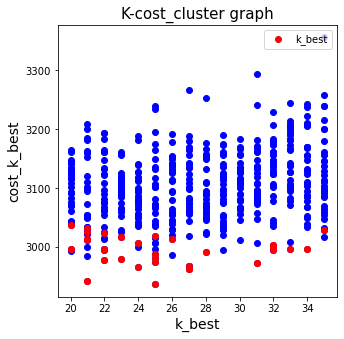

In [39]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("K-cost_cluster graph", fontsize = 15) #그래프의 제목설정
plt.xlabel("k_best", fontsize=14) #x축 라벨설정
plt.ylabel("cost_k_best", fontsize=14) #y축 라벨설정

plt.scatter(x_for_graph, y_for_graph, c='b') # cluster의 center를 빨강으로 표시

#plt.figure(figsize=(5, 5)) #그래프의 크기조절

#plt.title("K_best-cost_cluster graph", fontsize = 15) #그래프의 제목설정
#plt.xlabel("k", fontsize=14) #x축 라벨설정
#plt.ylabel("cost", fontsize=14) #y축 라벨설정

plt.scatter(k_best,cost_k_best, c='r', label='k_best') # cluster의 center를 빨강으로 표시
plt.legend(loc = 'upper right') #밑에 Scatter point 박스의 위치를 선정 


In [43]:
import collections
list = k_best
# 빈도수를 세려면?
counts = collections.Counter(list)
print(counts)
print('best_k: ', counts.most_common(1)[0][0])

best_k = counts.most_common(1)[0][0]

Counter({25: 5, 21: 5, 22: 4, 32: 3, 27: 2, 24: 2, 23: 2, 20: 2, 26: 1, 31: 1, 34: 1, 33: 1, 35: 1, 28: 1})
best_k:  25


# 위에서 구한 최적의 cluster 개수를 통해 군집화 진행

In [50]:
k=best_k
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(cities)


x_cen =[]
y_cen=[]
for i in range (0,10):
    x_cen.append(kmeans.cluster_centers_[i][0])
    y_cen.append(kmeans.cluster_centers_[i][1])

index_cluster_ele = []
index_total = []

for n in range (0,k):
    index_cluster_ele.append([])


for idx in range (0,1000):
        index_cluster_ele[y_pred[idx]].append(int(idx))
           
NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp_cen_dis = []
cen_dis = []
temp=100
i=0
for j in range(0,NUMBER_OF_CLUSTER):
    if i==j: #예외처리
        pass
    else:
        if(temp >= distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])):
            index_min_distance = j
            temp = distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])
            temp_cen_dis.append(j)
        else:
              pass
cen_dis.append(max(temp_cen_dis))
x_cen =[]
y_cen=[]
for i in range (0,len( kmeans.cluster_centers_)):
    x_cen.append(kmeans.cluster_centers_[i][0])
    y_cen.append(kmeans.cluster_centers_[i][1])

start_node_num = cen_dis[0]


center_path = deque([])
target_cluster = kmeans.cluster_centers_ #이따가 클러스터 내부도 하기 위해서 center들 모임도 cluster 취급
start_node_num = cen_dis[0]
cen_path = cen_greedy_path(target_cluster,start_node_num,center_path)
target_cluster = np_cities

path =[]
count = 0

for number_of_cluster in cen_path: #0~ 까지 위의 루트대로    
    temp_pos = [i for i, x in enumerate(y_pred) if x == number_of_cluster] #각 cluster의 index 가 저장돤다

####################오차의 원인##############################
  start_node_num = temp_pos[0] #클러스터 내부의 시작점    -------------------->유전 알고리즘으로 해결해보자(시작점을 바꾸면서)
#############################################################
    cluster_number = number_of_cluster
    start_node = kmeans.cluster_centers_[cluster_number] #오차가 무시할 정도

    path = greedy_path(target_cluster, start_node_num, path,temp_pos)

color 사용을 보다 편하게 하기 위해 배열로 선언

In [55]:
colors = ["black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" ,"black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan", "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan", "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate"]
print(len(colors))

190


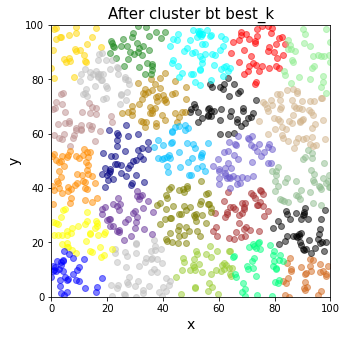

k= 25


In [56]:
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("After cluster bt best_k", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정


for cluster_index in range (0,k):
    for m in index_cluster_ele[cluster_index]:
        plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c=colors[cluster_index])

#c = 'b,g,r,c,y,m,k,w'  -> color
plt.show()
print("k=",k)

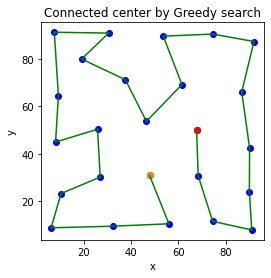

In [57]:
target_cluster = center_path

plt.figure(figsize=(4, 4)) #그래프의 크기조절
plt.scatter(x_cen,y_cen,c='b',alpha= 1) # cluster의 center를 빨강으로 표시

plt.scatter(x_cen[cen_path[0]],y_cen[cen_path[0]],c='r',alpha= 1)

plt.scatter(x_cen[cen_path[len(cen_path)-1]],y_cen[cen_path[len(cen_path)-1]],c='darkorange',alpha= 1)

plt.title("Connected center by Greedy search")
plt.xlabel("x")
plt.ylabel("y")

x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(kmeans.cluster_centers_[center_path[i]][0]))
    y.append(float(kmeans.cluster_centers_[center_path[i]][1]))

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")

    

plt.show()  #-> 그래프를 출력

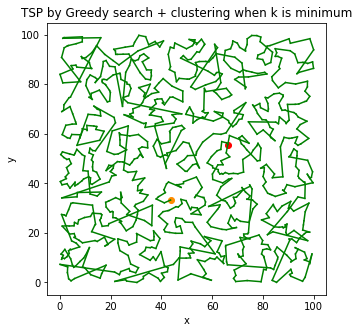

In [58]:
target_cluster = np_cities

plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.scatter(target_cluster[path[0]][0],target_cluster[path[0]][1],c='r',alpha= 1)
plt.scatter(target_cluster[path[len(np_cities)-1]][0],target_cluster[path[len(np_cities)-1]][1],c='darkorange',alpha= 1)

plt.title("TSP by Greedy search + clustering when k is minimum",)
plt.xlabel("x")
plt.ylabel("y")

x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(target_cluster[path[i]][0]))
    y.append(float(target_cluster[path[i]][1]))

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")

    

plt.show()  #-> 그래프를 출력

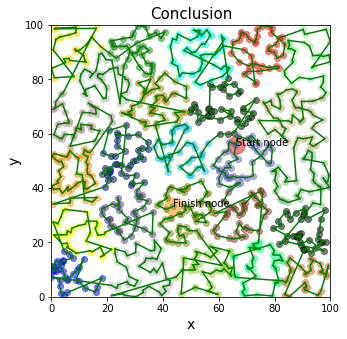

In [63]:
target_cluster = np_cities

plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("Conclusion", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

plt.scatter(target_cluster[path[0]][0],target_cluster[path[0]][1],c='r',alpha= 0.5,s=300)
plt.text(target_cluster[path[0]][0],target_cluster[path[0]][1], 'Start node')

plt.scatter(target_cluster[path[len(np_cities)-1]][0],target_cluster[path[len(np_cities)-1]][1],c='darkorange',alpha= 0.5,s=300)
plt.text(target_cluster[path[len(np_cities)-1]][0],target_cluster[path[len(np_cities)-1]][1], 'Finish node')

for cluster_index in range (0,k):
    for m in index_cluster_ele[cluster_index]:
        plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c=colors[cluster_index])
        
        
x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(target_cluster[path[i]][0]))
    y.append(float(target_cluster[path[i]][1]))

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")

plt.show()
#c = 'b,g,r,c,y,m,k,w'  -> color

In [123]:
len_of_cluster = []

for i in range (0,k):
    idx = center_path[i]
    lenth = (len(index_cluster_ele[idx]))
    len_of_cluster.append(lenth)


start_node_index = [0]
finish_node_index = []
temp = -1

for i in range (0,k):
    
    temp = temp+len_of_cluster[i]
    finish_node_index.append(temp)

for i in range (0,k-1):
    start_node_index.append(finish_node_index[i]+1)

#print(finish_node_index[:10])
#start_node_index[:10]

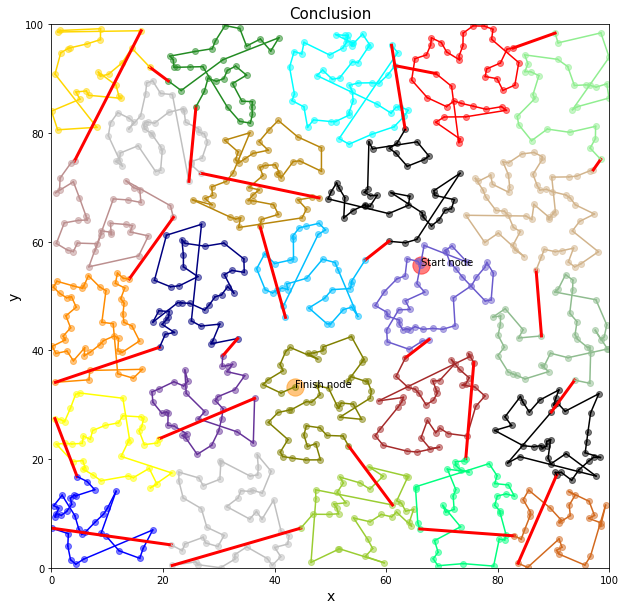

In [129]:
target_cluster = np_cities

plt.figure(figsize=(10, 10)) #그래프의 크기조절

plt.title("Conclusion", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

plt.scatter(target_cluster[path[0]][0],target_cluster[path[0]][1],c='r',alpha= 0.5,s=300)
plt.text(target_cluster[path[0]][0],target_cluster[path[0]][1], 'Start node')

plt.scatter(target_cluster[path[len(np_cities)-1]][0],target_cluster[path[len(np_cities)-1]][1],c='darkorange',alpha= 0.5,s=300)
plt.text(target_cluster[path[len(np_cities)-1]][0],target_cluster[path[len(np_cities)-1]][1], 'Finish node')



cluster_color = []

for cluster_index in center_path:
    for m in index_cluster_ele[cluster_index]:
        plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c=colors[cluster_index])
        cluster_color.append(colors[cluster_index]) #무슨 색깔을 썼는지 저장


        
#for cluster_index in range (0,k):
#    for m_idx in (0,len(index_cluster_ele[cluster_index])):
#        plt.scatter(float(cities[index_cluster_ele[cluster_index][m_idx]][0]),float(cities[index_cluster_ele[cluster_index][m_idx]][1]))
#        cluster_color.append(colors[m_idx]) #무슨 색깔을 썼는지 저장
        



x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(target_cluster[path[i]][0]))
    y.append(float(target_cluster[path[i]][1]))
    
    
# x : path 경로의 x 좌표 모음 
# y : path 경로의 y 좌표 모음 

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)    i는 0~ 999 로 증가
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    
    if i in finish_node_index:
        plt.plot(x_el,y_el,c= "red",linewidth = "3")
    else:
        plt.plot(x_el,y_el,c= cluster_color[i])
        

plt.show()


In [127]:
cal_cost(path)

3005.664446336043

결론 지금 한 클러스터에서 다른 클러스터 넘어갈때가 문제임     

####################오차의 원인##############################             
  start_node_num = temp_pos[0] #클러스터 내부의 시작점    -------------------->유전 알고리즘으로 해결해보자(시작점을 바꾸면서)        
#############################################################          

위에 이 부분을 수정하자